# TensorFlow: Linear Regression

## Linear Regression

The very known equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and **a** and **b** being the parameters we adjust. 

**a** is known as "slope" or "gradient" and **b** as "intercept".

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (6,5)

### Let's take an example

Let's define an independent variable:

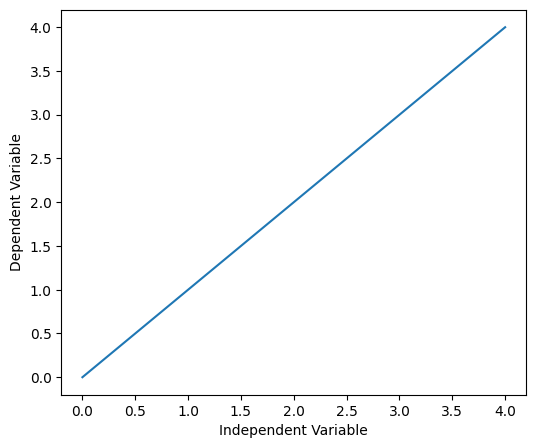

In [2]:
X = np.arange(0.0, 5.0, 1.0)

a = 1
b = 0

Y = a*X + b

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

A simple example of a linear function can help us understand the basic mechanism behind TensorFlow

For the first par we will generate random data points and define a linear relation, we'll use TensorFlow to adjust and get the right parameters.

In [3]:
X_data = np.random.rand(100).astype(np.float32)
print('Sample from X_data: %s' % X_data[0:5])

Sample from X_data: [0.77474934 0.5503023  0.4356595  0.8447642  0.69877106]


The equation for the model used in this example is:

$$Y = 7 X + 7 $$

Just as example, we choose that as our "generation" function because we liked it

In [4]:
y_data = X_data * 7 + 7
print('Sample from X_data: %s' % y_data[0:5])

Sample from X_data: [12.423245 10.852117 10.049617 12.913349 11.891397]


In [5]:
vectorizer = lambda y: y + np.random.normal(loc=0.0, scale=0.1)

'''
Define a vectorized function which takes a nested sequence of objects or
numpy arrays as inputs and returns an single or tuple of numpy array as
output.
'''
y_data = np.vectorize(vectorizer)(y_data) 
print('Sample from y_dat: %s' % y_data[0:5])

#Summary: Take the data originated with the 'real' function and 'change' it a little

Sample from y_dat: [12.52191303 10.95123726 10.03717146 12.85691576 11.77513054]


Here is a sample of data:

In [6]:
list(zip(X_data, y_data))[0:5]

[(0.77474934, 12.521913029122137),
 (0.5503023, 10.951237256204209),
 (0.4356595, 10.037171464937522),
 (0.8447642, 12.856915755122284),
 (0.69877106, 11.7751305382266)]

First, we initialize the variables "a" and "b" with some random guesses and define the 'objective' linear function

In [7]:
# Set model weights

W = tf.Variable(1.0, name="weight")
b = tf.Variable(0.2, name="bias")

In a linear regression, we minimized the squared error of the equation that we want to adjust minus the target values, so we define de equation to be minimized as **cost**

To find cost's value, tf.reduce_mean() is used. This function finds the mean of a multidimensional tensor, and the result can have a diferent dimension.

In [8]:
@tf.function
def cost(W, b):
    y_pred = W * X_data + b
    error = tf.reduce_mean(tf.square(y_data - y_pred))
    return error

Then we define the optimizer method. Here we will use a simple gradient descent with learning rate of 0.5

Now we will define the training method of our graph. 

We will use the tf.optimizers.SGD()

Now we are ready to start the optimization and run the graph

In [9]:
optimizer = tf.optimizers.SGD(learning_rate=0.5)

trainable_vars = [W, b]
train_data = []
print('W %.2f:' %W)
print('b %.2f:\n' %b)

epochs = 100 #(or however many iterations you want it to run)
for step in range(epochs):
    with tf.GradientTape() as tp:
        #your loss/cost function must always be contained within the gradient tape instantiation
        cost_fn = cost(W, b)
    gradients = tp.gradient(cost_fn, trainable_vars)
    optimizer.apply_gradients(zip(gradients, trainable_vars))
    
       
    if (step > 0 and step % 10== 0):
        print('At step %d:' %step)
        print('W %.2f:' %W)
        print('b %.2f:\n' %b)
        
    if(step % 10 == 0): #Almacenamos como ha ido yendo la cosa cada x pasos para plotear despues
        train_data.append([W, b])     

tf.print(W)
tf.print(b)

W 1.00:
b 0.20:

At step 10:
W 6.02:
b 7.49:

At step 20:
W 6.49:
b 7.25:

At step 30:
W 6.74:
b 7.12:

At step 40:
W 6.88:
b 7.05:

At step 50:
W 6.95:
b 7.02:

At step 60:
W 6.99:
b 7.00:

At step 70:
W 7.01:
b 6.99:

At step 80:
W 7.02:
b 6.98:

At step 90:
W 7.02:
b 6.98:

7.02422857
6.97782564


Plot the data

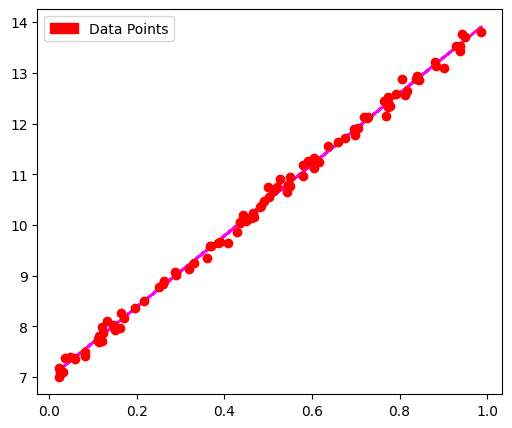

In [10]:
cr,cg,cb = (1.0, 1.0, 0.0)

for f in train_data: #Iterate over the steps
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if(cb > 1.0): cb = 1.0
    if(cg < 0.0): cg = 0.0
        
    [W,b] = f
    f_y = np.vectorize(lambda x: W*x + b)(X_data)
    line = plt.plot(X_data,f_y)
    plt.setp(line,color=(cr,cg,cb))
    
plt.plot(X_data, y_data,'ro')

green_line = mpatches.Patch(color='red',label='Data Points')

plt.legend(handles=[green_line])

plt.show()

# Example: Linear Regression with TensorFlow

This exercise is about modelling a linear relationship between "chirps of a cricket" and ground temperature. 

In 1948, G. W. Pierce in his book "Songs of Insects" mentioned that we can predict temperature by listening to the freuency of songs(chirps) made by stripped Crickets. He recorded change in behaviour of crickets by recording number of chirps made by them at several "different temperatures" and found that there is a pattern in the way crickets respond to the rate of change in ground temperature 60 to 100 degrees of farenhite. He also found out that Crickets did not sing   
above or below this temperature.

This data is derieved from the above mentioned book and aim is to fit a linear model and predict the "Best Fit Line" for the given "Chirps(per 15 Second)" in Column 'A' and the corresponding "Temperatures(Farenhite)" in Column 'B' using TensorFlow. So that one could easily tell what temperature it is just by listening to the songs of cricket. 



### Let's import tensorFlow and python dependencies 

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download and Explore the Data 

In [12]:
df = pd.read_csv("data/PierceCricketData.csv")
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [13]:
numInstances = len(df.index)

print('Number of observations: %d' % numInstances)

Number of observations: 15


Text(0, 0.5, 'Temp in Farenhiet')

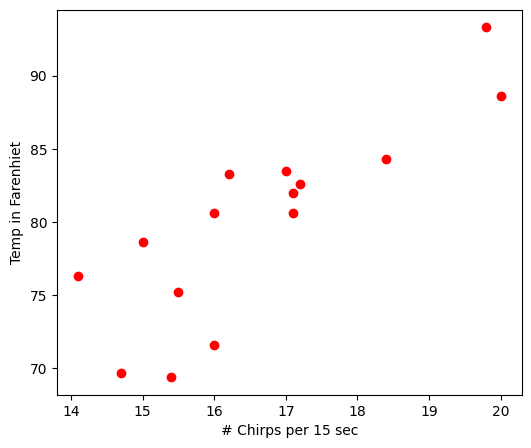

In [14]:
%matplotlib inline

x_data, y_data = (df["Chirps"].values,df["Temp"].values)
x_data = x_data.reshape(x_data.shape[0],1)
y_data = y_data.reshape(y_data.shape[0],1)

# plots the data points
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")

Looking at the scatter plot we can analyse that there is a linear relationship between the data points that connect chirps to the temperature and optimal way to infer this knowledge is by fitting a line that best describes the data. Which follows the linear equation: 

 ####                                          Ypred = W X + b 

We have to estimate the values of the slope 'W' and the inrtercept 'b' to fit a line where, X is the "Chirps" and Ypred is "Predicted Temperature" in this case. 

### Create a Data Flow Graph using TensorFlow 

Model the above equation by assigning arbitrary values of your choice for slope "W" and intercept "b" which can predict the temp "Ypred" given Chirps "X" as input. 

Also, create a place holder for actual temperature "Y" which we will be needing for Optimization to estimate the actual values of slope and intercept.

In [15]:
# Create Variables 

W = tf.Variable(1.0)
b = tf.Variable(0.1)

# Model
y_pred_ph = x_data*W + b

y_pred_ph

<tf.Tensor: shape=(15, 1), dtype=float32, numpy=
array([[20.1     ],
       [16.1     ],
       [19.9     ],
       [18.5     ],
       [17.2     ],
       [15.6     ],
       [14.8     ],
       [17.2     ],
       [15.5     ],
       [16.300001],
       [15.1     ],
       [17.300001],
       [16.1     ],
       [17.1     ],
       [14.200001]], dtype=float32)>

###  Create and Run a Session to Visualize the Predicted Line from above Graph 

In [16]:
@tf.function
def cost(W, b):
    y_pred = W * x_data + b
    error = tf.reduce_mean(tf.square(y_data - y_pred))
    return error

In [17]:
optimizer = tf.optimizers.SGD(learning_rate=0.001)

trainable_vars = [W, b]
train_data = []
losses = []
print('W %.2f:' %W)
print('b %.2f:\n' %b)

epochs = 100 #(or however many iterations you want it to run)
for step in range(epochs):
    with tf.GradientTape() as tp:
        #your loss/cost function must always be contained within the gradient tape instantiation
        cost_fn = cost(W, b)
    
    losses.append(cost_fn)
    gradients = tp.gradient(cost_fn, trainable_vars)
    optimizer.apply_gradients(zip(gradients, trainable_vars))
       
    if (step > 0 and step % 10== 0):
        print('At step %d:' %step)
        print('W %.2f:' %W)
        print('b %.2f:\n' %b)
        
    if(step % 10 == 0): #Almacenamos como ha ido yendo la cosa cada x pasos para plotear despues
        train_data.append([W, b])     

tf.print(W)
tf.print(b)

W 1.00:
b 0.10:

At step 10:
W 4.77:
b 0.33:

At step 20:
W 4.77:
b 0.34:

At step 30:
W 4.77:
b 0.34:

At step 40:
W 4.77:
b 0.35:

At step 50:
W 4.77:
b 0.35:

At step 60:
W 4.77:
b 0.36:

At step 70:
W 4.77:
b 0.36:

At step 80:
W 4.77:
b 0.37:

At step 90:
W 4.77:
b 0.37:

4.77003717
0.375807285


### Print the predicted function

Text(0, 0.5, 'Temp in Farenhiet')

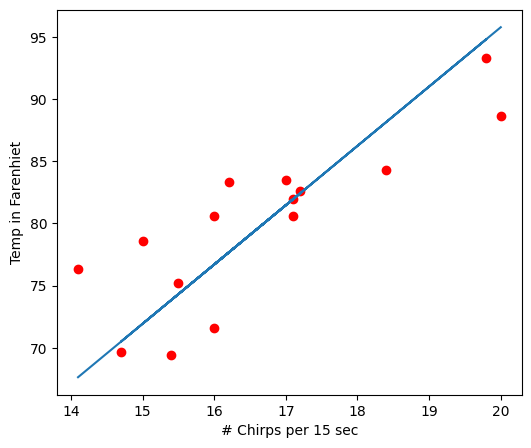

In [18]:
# Plot the line

%matplotlib inline

y_pred = x_data*W + b

# plots the data points
plt.plot(x_data, y_data , 'ro')
plt.plot(x_data, y_pred)
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")

### Print the loss function

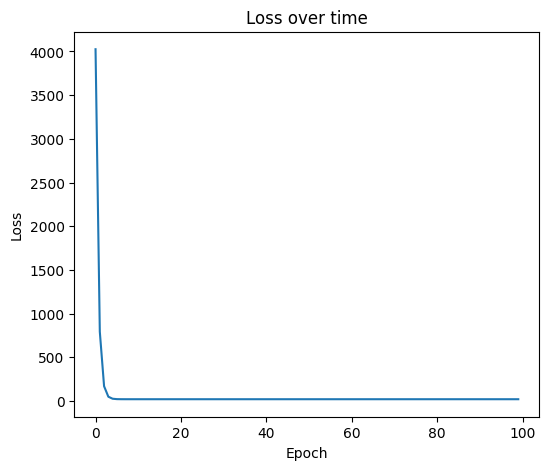

In [19]:
# Your Code Goes Here
%matplotlib inline

plt.plot(losses)
plt.title('Loss over time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
